In [2]:
from sklearn.datasets import load_files
import numpy as np

train_dir = '../input/fruits/Fruits_1/Training'
test_dir = '../input/fruits/Fruits_1/Test'

def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
    
x_train, y_train,target_labels = load_dataset(train_dir)
x_test, y_test,_ = load_dataset(test_dir)
print('Loading complete!')

print('Training set size : ' , x_train.shape[0])
print('Testing set size : ', x_test.shape[0])

Loading complete!
Training set size :  21168
Testing set size :  7115


In [3]:
target_labels

array(['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1',
       'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith',
       'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3',
       'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2',
       'Banana', 'Banana Lady Finger', 'Banana Red', 'Cherry 1',
       'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red',
       'Cherry Wax Yellow', 'Grape Blue', 'Grape Pink', 'Grape White',
       'Grape White 2', 'Grape White 3', 'Grape White 4',
       'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Lychee', 'Mango',
       'Mango Red', 'Orange', 'Pineapple', 'Pineapple Mini', 'Raspberry',
       'Redcurrant', 'Strawberry', 'Strawberry Wedge'], dtype='<U19')

In [4]:
no_of_classes = len(np.unique(y_train))
no_of_classes

41

In [5]:
x_train.shape

(21168,)

In [6]:
x_train

array(['../input/fruits/Fruits_1/Training/Banana Lady Finger/r_4_100.jpg',
       '../input/fruits/Fruits_1/Training/Cherry 2/15_100.jpg',
       '../input/fruits/Fruits_1/Training/Raspberry/1_100.jpg', ...,
       '../input/fruits/Fruits_1/Training/Cherry Wax Black/279_100.jpg',
       '../input/fruits/Fruits_1/Training/Cherry Wax Yellow/197_100.jpg',
       '../input/fruits/Fruits_1/Training/Apple Granny Smith/r_260_100.jpg'],
      dtype='<U67')

In [7]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train,no_of_classes)
y_test = np_utils.to_categorical(y_test,no_of_classes)
y_train[0]

Using TensorFlow backend.


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [8]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import keras
import numpy as np # linear algebra
import keras.backend as K 
import time as ti 
import cv2
import os
import glob # for including images
import scipy.io as sio
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Activation, GlobalAveragePooling2D
from tensorflow.python.keras.layers import Conv2D, DepthwiseConv2D, MaxPooling2D, AveragePooling2D  
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.optimizers import RMSprop, SGD, Adadelta, Adam 
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import tensorflow as tf

In [9]:
len(x_train)

21168

In [10]:
x_test,x_valid =x_test[3500:],x_test[:3500]
y_test,y_valid = y_test[3500:],y_test[:3500]
print('Vaildation X : ',x_valid.shape)
print('Vaildation y :',y_valid.shape)
print('Test X : ',x_test.shape)
print('Test y : ',y_test.shape)

Vaildation X :  (3500,)
Vaildation y : (3500, 41)
Test X :  (3615,)
Test y :  (3615, 41)


In [11]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

x_train = np.array(convert_image_to_array(x_train))
print('Training set shape : ',x_train.shape)

x_valid = np.array(convert_image_to_array(x_valid))
print('Validation set shape : ',x_valid.shape)

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

print('1st training image shape ',x_train[0].shape)

Training set shape :  (21168, 100, 100, 3)
Validation set shape :  (3500, 100, 100, 3)
Test set shape :  (3615, 100, 100, 3)
1st training image shape  (100, 100, 3)


In [12]:
x_train/=255
x_valid/=255
x_test/=255

In [13]:
# model = Sequential()
# nf1=20; nf2=30; nf3=10; 
# pad='same'
    
# # First conv layer
# model.add(Conv2D(filters=nf1,padding=pad, kernel_size=(3,3),input_shape=(100,100,3), activation='relu',))
# model.add(MaxPooling2D(pool_size=(4, 4),strides=(2,2),padding=pad))
    
# # Second conv layer
# model.add(Conv2D(filters=nf2,padding=pad, kernel_size=(3,3), activation='relu',))
# model.add(MaxPooling2D(pool_size=(4, 4),strides=(2,2),padding=pad))
    
# # Third conv layer 
# model.add(Conv2D(filters=nf3,padding=pad, kernel_size=(3,3), activation='relu',))
# model.add(MaxPooling2D(pool_size=(4, 4),strides=(2,2),padding=pad))
 
# model.add(GlobalAveragePooling2D())
# # model.add(Flatten())
    
# # Output with 131 neurons ( 131 classes )
# model.add(Dense(41, activation='softmax'))
    
# # model.compile(loss='categorical_crossentropy', 
# #               optimizer='adam',
# #               metrics=['accuracy',recall])

In [33]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K
import numpy as np

tf.compat.v1.set_random_seed(
    0
)
np.random.seed(0)

model=Sequential()
model.add(Conv2D(filters = 16, kernel_size = 2,input_shape=(100,100,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 256,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(150))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(41,activation = 'softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 100, 100, 16)      208       
_________________________________________________________________
activation_3 (Activation)    (None, 100, 100, 16)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 50, 50, 32)        2080      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 25, 25, 64)        8256      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 64)       

In [34]:
def recall(y_true, y_pred):
     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
     possible_positives= K.sum(K.round(K.clip(y_true, 0, 1)))
     recall = true_positives / (possible_positives + K.epsilon())
     return recall

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
model.compile(loss='categorical_crossentropy',
              optimizer='nadam',
              metrics=['accuracy',recall,precision])
print('Compiled!')

Compiled!


In [36]:
from keras.models import Sequential
import tensorflow as tf
import numpy as np
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K
# batch_size = 100
# input_shape=(1001,100,3)
# epochs=30

tf.compat.v1.set_random_seed(0)
np.random.seed(0)
checkpointer = ModelCheckpoint(filepath = 'cnn_from_scratch_fruits.hdf5', verbose = 2, save_best_only = True,mode='max',monitor='val_accuracy')


train_image_generator = ImageDataGenerator(rotation_range=45,width_shift_range=.15,height_shift_range=.15,horizontal_flip=True, zoom_range=0.3)
train_data_gen = train_image_generator.flow(x_train,y_train)





# history=model.fit(train_data_gen,
#           steps_per_epoch=500, epochs=10,validation_data=(x_valid,y_valid),
#         callbacks = [checkpointer],
#                     verbose=2,shuffle=True)

history=model.fit(train_data_gen,
                       steps_per_epoch=500,
                       epochs=10,
                       verbose=1,
                       validation_data=(x_valid,y_valid),
                       callbacks=[checkpointer]
                      )


            


Epoch 1/10
500/500 [==============================] - 39s 77ms/step - loss: 1.7765 - accuracy: 0.4461 - recall: 0.3103 - precision: 0.6114 - val_loss: 0.5417 - val_accuracy: 0.8320 - val_recall: 0.7888 - val_precision: 0.8863

Epoch 00001: val_accuracy improved from -inf to 0.83200, saving model to cnn_from_scratch_fruits.hdf5
Epoch 2/10
500/500 [==============================] - 37s 75ms/step - loss: 0.4942 - accuracy: 0.8346 - recall: 0.7914 - precision: 0.8789 - val_loss: 0.1688 - val_accuracy: 0.9449 - val_recall: 0.9426 - val_precision: 0.9516

Epoch 00002: val_accuracy improved from 0.83200 to 0.94486, saving model to cnn_from_scratch_fruits.hdf5
Epoch 3/10
500/500 [==============================] - 38s 76ms/step - loss: 0.2832 - accuracy: 0.9084 - recall: 0.8928 - precision: 0.9235 - val_loss: 0.1239 - val_accuracy: 0.9563 - val_recall: 0.9546 - val_precision: 0.9596

Epoch 00003: val_accuracy improved from 0.94486 to 0.95629, saving model to cnn_from_scratch_fruits.hdf5
Epoch 4

In [37]:
dict_idx_fruit = {idx: label for idx, label in enumerate(target_labels)}
print(dict_idx_fruit)


{0: 'Apple Braeburn', 1: 'Apple Crimson Snow', 2: 'Apple Golden 1', 3: 'Apple Golden 2', 4: 'Apple Golden 3', 5: 'Apple Granny Smith', 6: 'Apple Pink Lady', 7: 'Apple Red 1', 8: 'Apple Red 2', 9: 'Apple Red 3', 10: 'Apple Red Delicious', 11: 'Apple Red Yellow 1', 12: 'Apple Red Yellow 2', 13: 'Banana', 14: 'Banana Lady Finger', 15: 'Banana Red', 16: 'Cherry 1', 17: 'Cherry 2', 18: 'Cherry Rainier', 19: 'Cherry Wax Black', 20: 'Cherry Wax Red', 21: 'Cherry Wax Yellow', 22: 'Grape Blue', 23: 'Grape Pink', 24: 'Grape White', 25: 'Grape White 2', 26: 'Grape White 3', 27: 'Grape White 4', 28: 'Grapefruit Pink', 29: 'Grapefruit White', 30: 'Guava', 31: 'Lychee', 32: 'Mango', 33: 'Mango Red', 34: 'Orange', 35: 'Pineapple', 36: 'Pineapple Mini', 37: 'Raspberry', 38: 'Redcurrant', 39: 'Strawberry', 40: 'Strawberry Wedge'}


In [38]:
num_categories = len(np.unique(y_train))
num_categories

2

In [39]:
model.load_weights('cnn_from_scratch_fruits.hdf5')

In [40]:
# test_image_generator.flow(x_test,y_test)
score = model.evaluate(x_test,y_test)
print('\n', 'Test accuracy:', score[1])

3615/3615 [==============================] - 1s 180us/step

 Test accuracy: 0.9786998629570007


In [41]:
preds=np.round(model.predict(x_test),0)
print("Rounded test_labels",preds)

Rounded test_labels [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


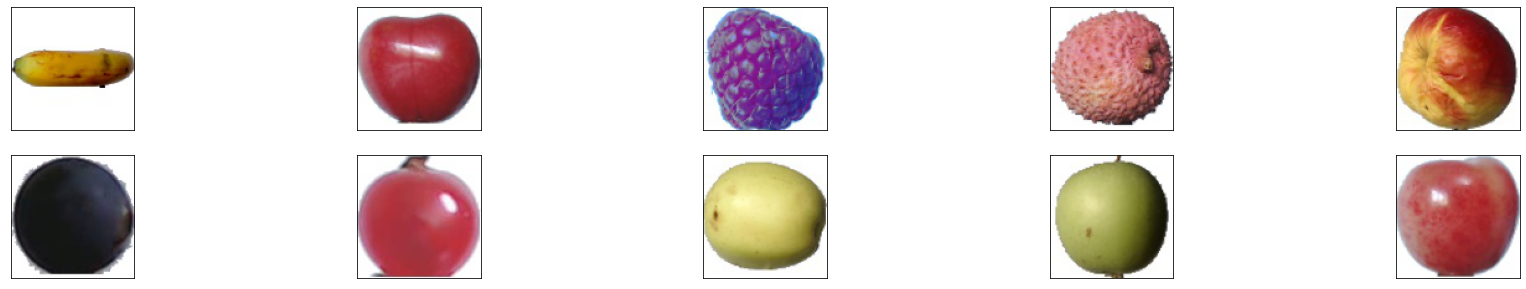

In [42]:
#Let's visualize the first 10 training images!
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(30,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]))
# Yummy fruits ;)

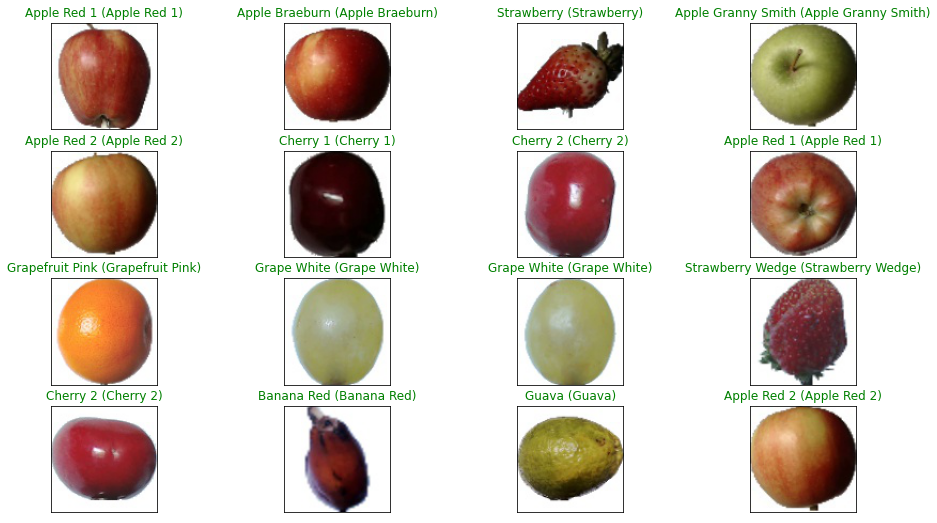

In [43]:
# Let's visualize test prediction.

y_pred = model.predict(x_test)

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

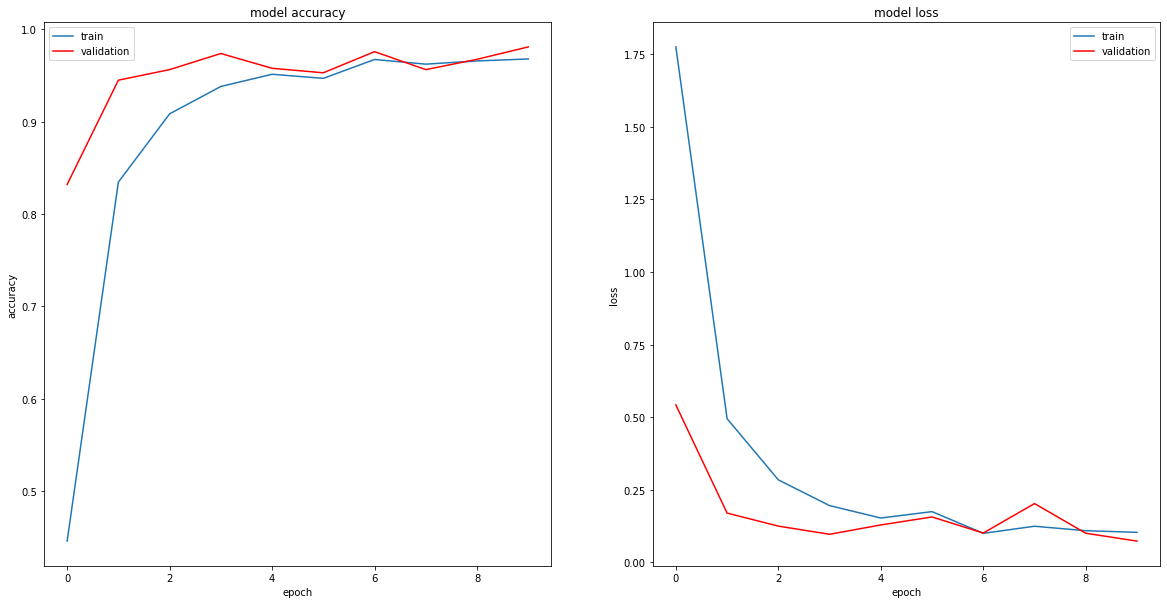

In [44]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,10))
   
 # summarize history for accuracy  
   
plt.subplot(121)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'],color='red')  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'validation'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(122)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'],color='red')  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'validation'], loc='upper right')  
plt.show()

In [45]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(
    y_test.argmax(axis=1), preds.argmax(axis=1))
cm

array([[ 58,   0,   0, ...,   0,   0,   0],
       [  0,  45,   0, ...,   0,   0,   0],
       [  0,   0,  86, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  74,   0,   0],
       [  0,   0,   0, ...,   0,  88,   0],
       [  0,   0,   0, ...,   0,   0, 131]])

In [46]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
classification=metrics.classification_report(y_test,preds)
print(classification)

              precision    recall  f1-score   support

           0       1.00      0.65      0.79        89
           1       1.00      0.55      0.71        82
           2       1.00      1.00      1.00        86
           3       1.00      1.00      1.00        78
           4       1.00      1.00      1.00        88
           5       1.00      1.00      1.00        84
           6       0.66      1.00      0.80        72
           7       1.00      1.00      1.00        81
           8       0.71      1.00      0.83        76
           9       1.00      1.00      1.00        64
          10       1.00      1.00      1.00        91
          11       1.00      0.90      0.95        81
          12       1.00      1.00      1.00       106
          13       1.00      1.00      1.00        88
          14       1.00      1.00      1.00        86
          15       1.00      1.00      1.00        82
          16       1.00      1.00      1.00        81
          17       1.00    

In [47]:
cm.shape

(41, 41)

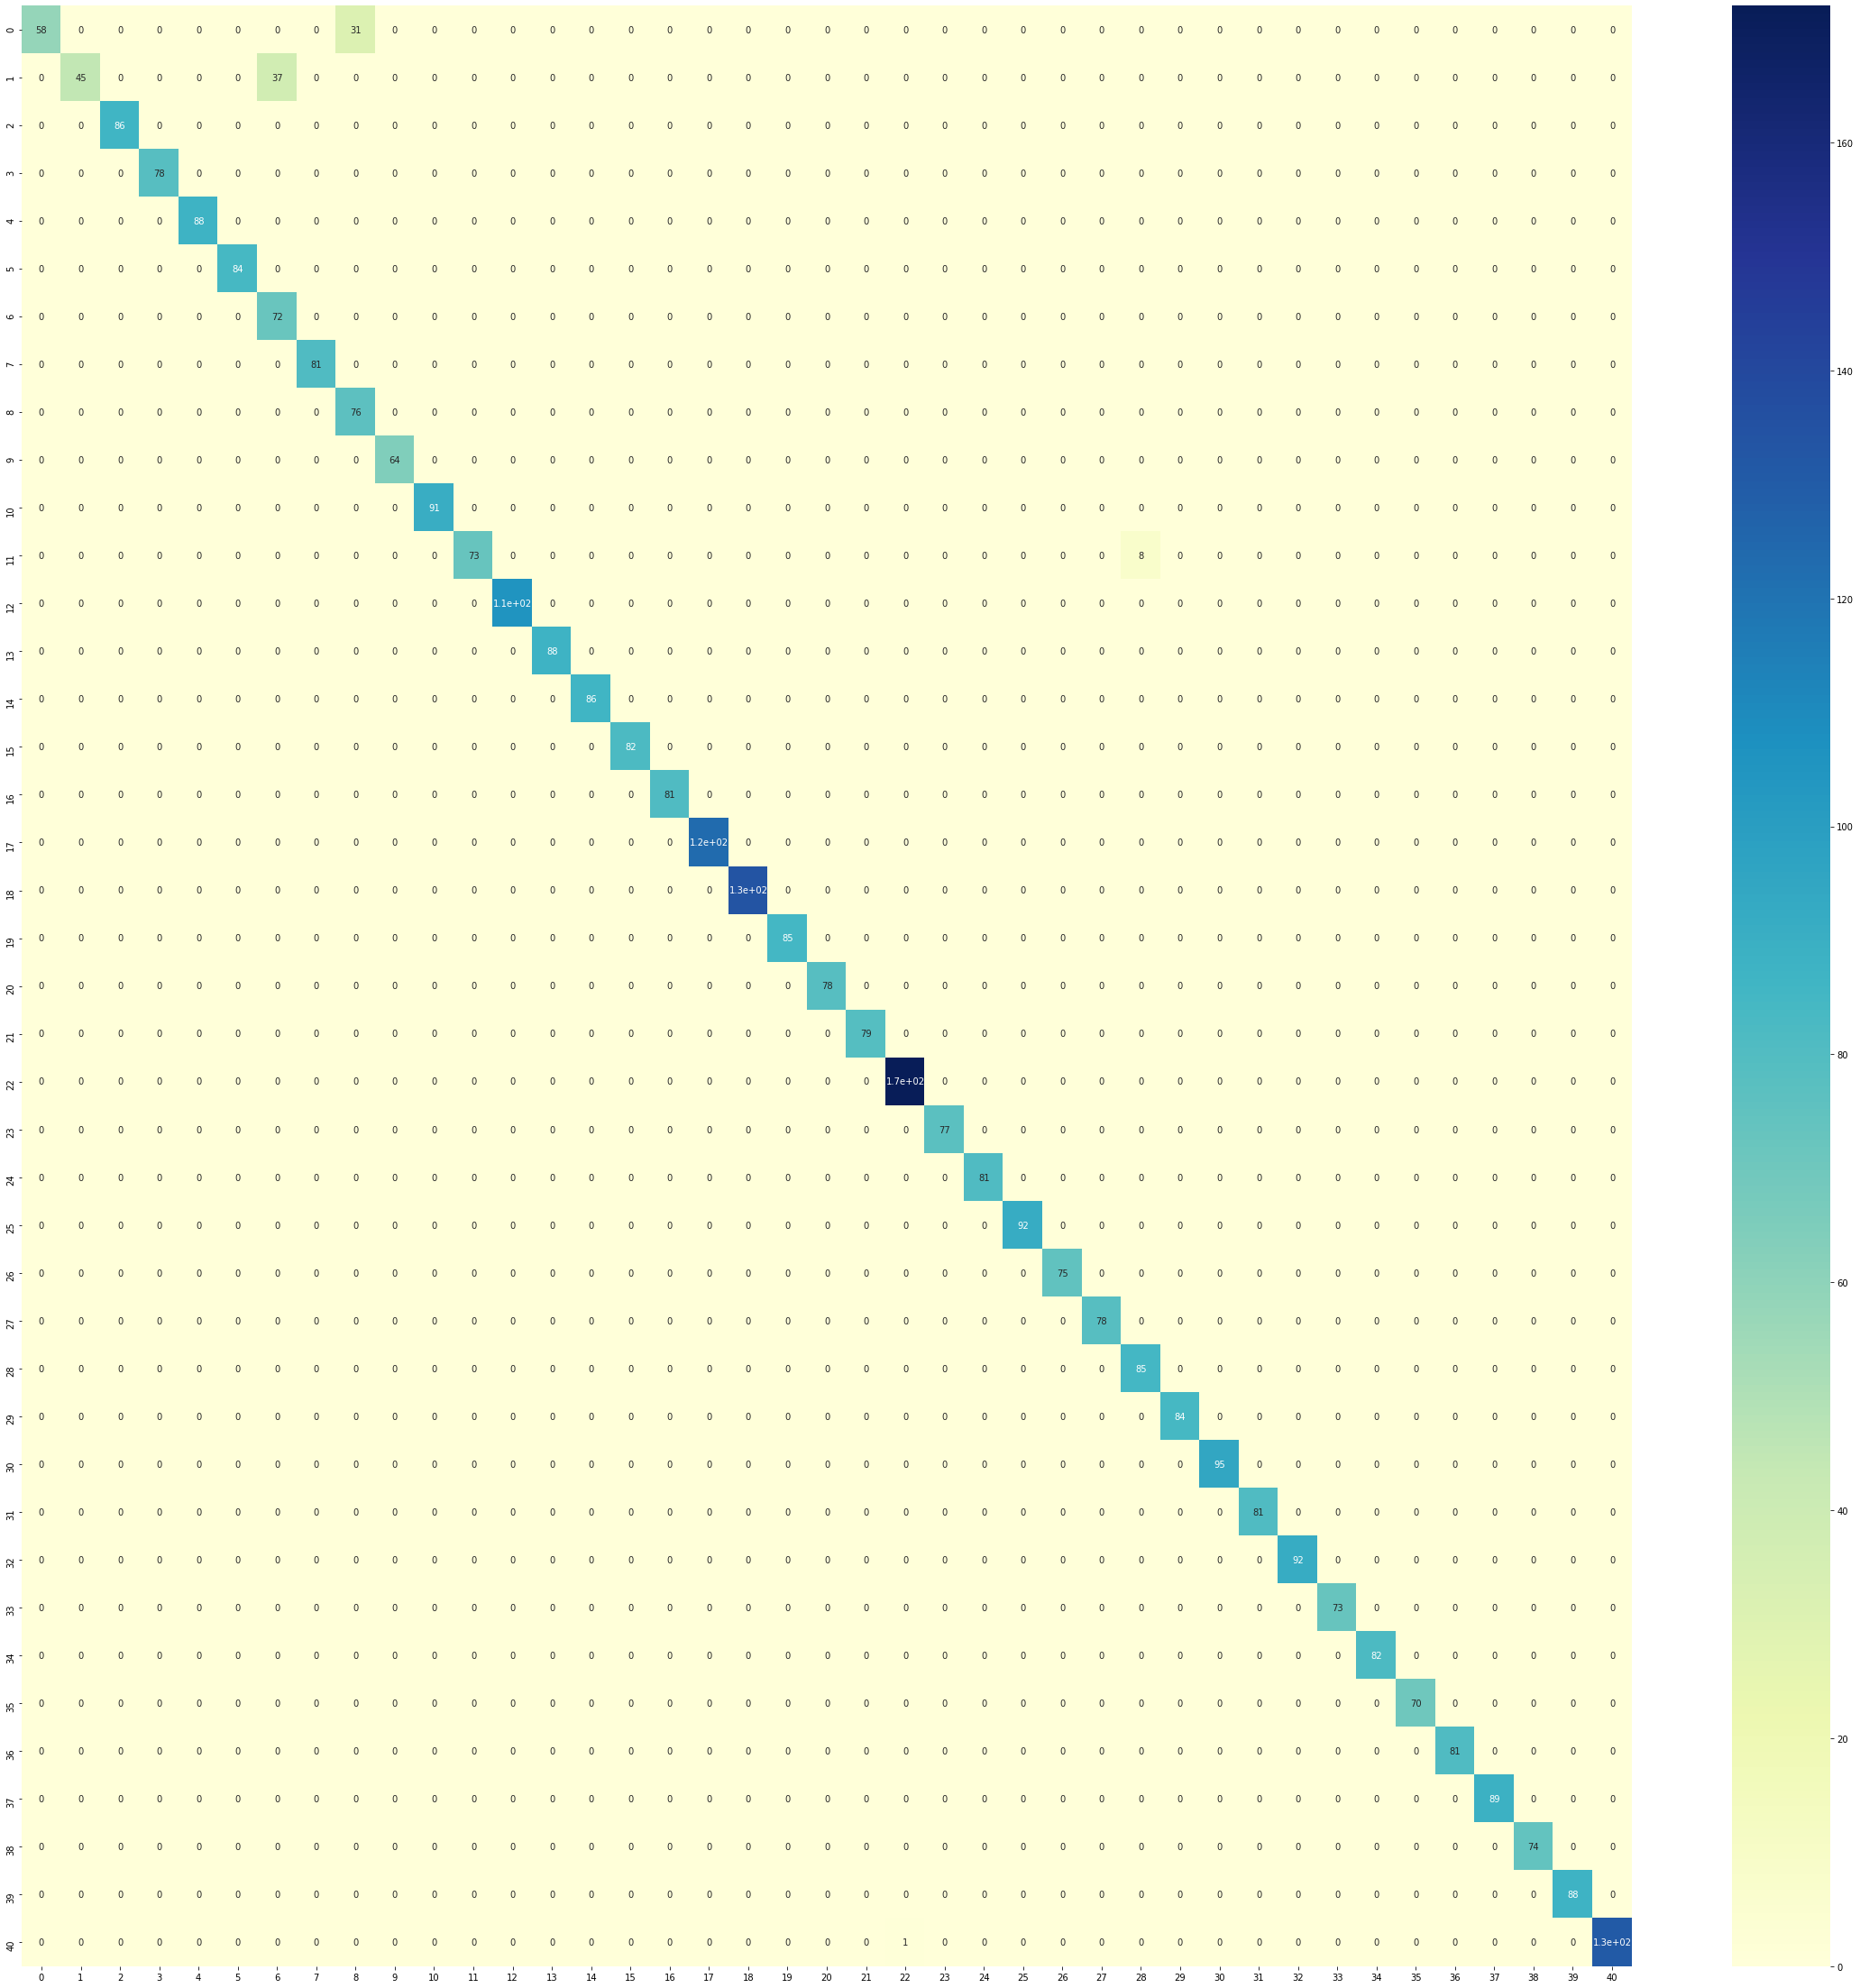

In [48]:


import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(cm, index = [i for i in range(41)],
                  columns = [i for i in range(41)])
plt.figure(figsize = (40,40))
sn.heatmap(df_cm, annot=True,cmap="YlGnBu")

In [49]:
y_test.shape

(3615, 41)

In [ ]:
# for layer in model.layers:
#     if 'conv2d' in layer.name:
#         weights, bias= layer.get_weights()
#         print(layer.name, filters.shape)
        
#         #normalize filter values between  0 and 1 for visualization
#         f_min, f_max = weights.min(), weights.max()
#         filters = (weights - f_min) / (f_max - f_min)  
#         print(filters.shape[3])
#         filter_cnt=1
        
#         #plotting all the filters
#         for i in range(filters.shape[5]):
#             #get the filters
#             filt=filters[:,:,:, i]
#             #plotting each of the channel, color image RGB channels
#             for j in range(filters.shape[0]):
#                 ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt  )
#                 ax.set_xticks([])
#                 ax.set_yticks([])
#                 plt.imshow(filt[:,:, j])
#                 filter_cnt+=1
#         plt.show()

In [51]:
from sklearn import metrics
metrics.roc_auc_score(y_test, preds,multi_class="ovr",average='weighted')


0.9891203013913727